<a href="https://colab.research.google.com/github/cavalcantiju/projeto4_ML_sitecarros/blob/main/site_venda_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/guilhermesilveira/introducao-a-classificacao/feac6aac77a293330dad3f256a890c863feea9fe/precos.csv")

site de venda de carros. o modelo deve falar tipo ah eu acho q por esse valor nao vende|

In [54]:
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


é interessante pra mim eu mudar milhas pra km por hora

In [55]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [56]:
from datetime import datetime
dados["idade"] = datetime.today().year - dados["ano_do_modelo"]
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,26
1,7843,1998,40557.96,1,12622.05362,28
2,7109,2006,89627.50,0,11440.79806,20
3,26823,2015,95276.14,0,43167.32682,11
4,7935,2014,117384.68,1,12770.11290,12


In [57]:
dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)
dados.head()

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,26
1,40557.96,1,12622.05362,28
2,89627.50,0,11440.79806,20
3,95276.14,0,43167.32682,11
4,117384.68,1,12770.11290,12


In [58]:
dados.shape

(10000, 4)

In [59]:
x = dados[["preco", "idade", "km_por_ano"]]
y = dados["vendido"]

In [60]:
len(dados.query("vendido == True")) / len(dados)
# porcentagem de vendidos! tipo: como se eu falasse "sim" para todo
#"esse carro foi vendido?" e ele acerta 58%

0.58

In [61]:
#DUMMY CLASSIFIER

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier


SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                random_state = SEED,
                                                stratify = y)
print(f"Treinaremos com {len(raw_treino_x)} elementos e testaremos com {len(raw_teste_x)} elementos")

classificador = DummyClassifier(strategy='stratified')
classificador.fit(raw_treino_x, treino_y)
previsoes = classificador.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy classifier foi de {acuracia: .2f}  %")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do dummy classifier foi de  52.00  %


In [62]:
#DUMMY CLASSIFIER

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier


SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                random_state = SEED,
                                                stratify = y)
print(f"Treinaremos com {len(raw_treino_x)} elementos e testaremos com {len(raw_teste_x)} elementos")

classificador = DummyClassifier()
classificador.fit(raw_treino_x, treino_y)
previsoes = classificador.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy classifier foi de {acuracia: .2f}  %")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do dummy classifier foi de  58.00  %


In [63]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                random_state = SEED,
                                                stratify = y)
print(f"Treinaremos com {len(raw_treino_x)} elementos e testaremos com {len(raw_teste_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_treino_x) #vai aprender a reescalar os dados
#scaler preencha de acordo c os dados do treino

#agr treinei ent preciso reescalar
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
#fit() calcula os parâmetros de transformação no treino, e
#transform() aplica esses parâmetros tanto no treino quanto no teste.

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"A acurácia foi de {acuracia*100: .2f}  %")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de  75.92  %


In [64]:

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                random_state = SEED,
                                                stratify = y)
print(f"Treinaremos com {len(raw_treino_x)} elementos e testaremos com {len(raw_teste_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_treino_x) #vai aprender a reescalar os dados
#scaler preencha de acordo c os dados do treino

#agr treinei ent preciso reescalar
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
#fit() calcula os parâmetros de transformação no treino, e
#transform() aplica esses parâmetros tanto no treino quanto no teste.

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"A acurácia foi de {acuracia*100: .2f}  %")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de  69.92  %


Um `StandardScaler` do `sklearn.preprocessing` é usado para padronizar features, removendo a média e escalonando para a variância unitária. Este processo é crucial ao trabalhar com algoritmos sensíveis à escala das features de entrada, como Support Vector Machines (SVC e LinearSVC) ou K-Nearest Neighbors.

Aqui está um detalhamento:

*   **`scaler.fit(raw_treino_x)`**: Esta etapa calcula a média e o desvio padrão para cada feature em `raw_treino_x` (seus dados de treinamento). Ele *aprende* os parâmetros de escalonamento a partir dos dados de treinamento.
*   **`treino_x = scaler.transform(raw_treino_x)`**: Isso aplica o escalonamento (usando a média e o desvio padrão aprendidos de `raw_treino_x`) ao próprio `raw_treino_x`, transformando-o em `treino_x`.
*   **`teste_x = scaler.transform(raw_teste_x)`**: Esta é a parte importante. O método `transform` também é aplicado a `raw_teste_x` (seus dados de teste) usando os *mesmos* parâmetros de escalonamento (média e desvio padrão) que foram aprendidos a partir dos dados de *treinamento* (`raw_treino_x`).

**Por que usar `transform` nos dados de treino e teste, e por que ajustar (`fit`) apenas nos dados de treino?**

1.  **Evitar Vazamento de Dados (Data Leakage)**: Ao ajustar o scaler apenas nos dados de treinamento, você garante que as informações do conjunto de teste não 'vazem' para o processo de treinamento. Se você ajustasse o scaler em todo o conjunto de dados (treino + teste), seu modelo aprenderia implicitamente com a distribuição do conjunto de teste, levando a uma avaliação superotimista de seu desempenho.
2.  **Transformação Consistente**: A mesma transformação de escalonamento deve ser aplicada tanto aos conjuntos de dados de treinamento quanto aos de teste. Isso garante que as features em ambos os conjuntos estejam na mesma escala, o que é essencial para que o modelo faça previsões consistentes.

In [66]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                random_state = SEED,
                                                stratify = y)
print(f"Treinaremos com {len(raw_treino_x)} elementos e testaremos com {len(raw_teste_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_treino_x) #vai aprender a reescalar os dados
#scaler preencha de acordo c os dados do treino

#agr treinei ent preciso reescalar
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
#fit() calcula os parâmetros de transformação no treino, e
#transform() aplica esses parâmetros tanto no treino quanto no teste.

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"A acurácia foi de {acuracia*100: .2f}  %")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de  78.40  %


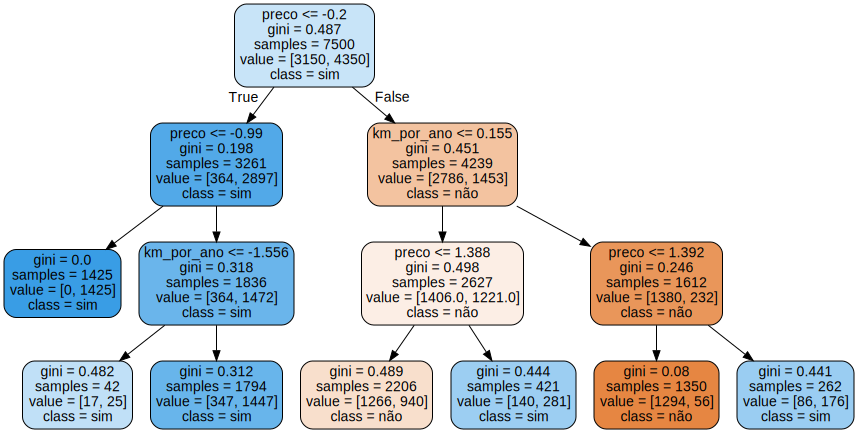

In [71]:
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(modelo, filled=True, rounded=True,
                            feature_names = x.columns,
                            class_names=["não", "sim"])
grafico = graphviz.Source(estrutura)
grafico